loss train: 345.0
 loss test: 345.0
total： 345  error: 182  acc rate: 0.47246376811594204
total： 345  error: 201  acc rate: 0.4173913043478261
loss train: 333.553025675
 loss test: 334.424922419
total： 345  error: 49  acc rate: 0.8579710144927536
total： 345  error: 57  acc rate: 0.8347826086956522
loss train: 322.106051576
 loss test: 323.849845057
total： 345  error: 49  acc rate: 0.8579710144927536
total： 345  error: 57  acc rate: 0.8347826086956522
loss train: 310.659077705
 loss test: 313.274767916
total： 345  error: 49  acc rate: 0.8579710144927536
total： 345  error: 57  acc rate: 0.8347826086956522
loss train: 299.21210406
 loss test: 302.699690994
total： 345  error: 49  acc rate: 0.8579710144927536
total： 345  error: 57  acc rate: 0.8347826086956522
loss train: 287.765130642
 loss test: 292.124614293
total： 345  error: 49  acc rate: 0.8579710144927536
total： 345  error: 57  acc rate: 0.8347826086956522
loss train: 276.31815745
 loss test: 281.549537811
total： 345  error: 49  acc 

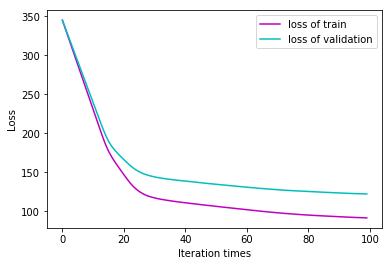

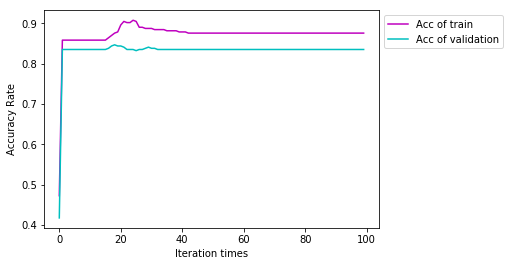

In [88]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

eta = 0.0001 # Learning Rate
iter =100 # Iteration times
accuracy = 0.001 # If loss<accuracy , then stop iteration
lam = 0.0001 #lambda used in Loss Function

m = 690 # Amount of data
m_train = 345 # Amount of training data
m_test = 345 # Amount of testing data
features=14 # Fearures of dataset

#Initialize arrays
w= [0]*features  #All zero initialization

#used to stastic and draw graph
iter_num = [0]*iter;
loss_train  = [0]*iter;
loss_test  = [0]*iter;
acc_train = [0]*iter;
acc_test = [0]*iter;

#Use to get dataset from file
def get_data():
    data = load_svmlight_file("dataset\\australian_scale",n_features=features)
    return data[0], data[1]

#Use to split dataset and return
def split_data():
    X, y = get_data()
    X = X.toarray()
    return train_test_split( X, y, test_size=0.5, random_state=43)

#Loss function  
def loss(m,X,y):
    loss = 0.0
    for i in range (0,m):
        y_predict = 0
        for j in range(0,features):
            y_predict = y_predict + X[i][j] * w[j]
        if(y[i]*y_predict-1<0):
            loss += (1-y[i]*y_predict)
    for  j in range (0,features):
        loss = loss + 0.5 * lam * w[j] * w[j]
    return loss


#Derivative the Loss function to get Gradient
def derivative(m,X,y):
    y_predict = [0]*m 
    for i in range (0,m):
        y_predict[i] = 0
        for j in range(0,features):
            y_predict[i] = y_predict[i] + X[i][j] * w[j]
    
    grad = [0] * features
    for j in range(0,features):
        grad[j] = abs(lam*w[j])
        for i in range(0,m):
            if(y[i]*y_predict[i]-1<0):
                grad[j] = grad[j] - y[i] * X[i][j]
    return grad
                
#Process Gradient descent to minimum the Loss
def update(m,X,y):
    grad = derivative(m,X,y)
    for j in range(0,features):
        w[j] = w[j] - eta*grad[j]
        
#Train and validate 
def trainAndTest():
    for i in range (0,iter):
        iter_num[i] = i;
        
                
        loss_train[i] = loss(m_train,X_train,y_train)
        print("loss train:",loss_train[i]);
        
        loss_test[i] = loss(m_test,X_test,y_test)
        print(" loss test:",loss_test[i]);
        
        acc_train[i] = accRate(m_train,X_train,y_train)
        acc_test[i] = accRate(m_test,X_test,y_test)
            
        update(m_train,X_train,y_train)
        
#The linear model
def predict(x):
    pre = 0.0
    for j in range (0,features):
        pre = pre + x[j] * w[j]
    if(pre>=0) :
        return 1
    else:
        return -1

def accRate(m,X,y):
    error = 0
    for i in range(0,m):
        if(predict(X[i])!=y[i]):
            error+=1
    print("total：",m," error:",error," acc rate:",1.0 - error/m )
    return 1.0 - error/m
    
    
#Main 
X_train, X_test, y_train, y_test = split_data()

    
trainAndTest()


#Print the information and draw graphs
print("Features:",w)
fig, ax = plt.subplots()
ax.plot(iter_num, loss_train,color = 'm', label='loss of train')
ax.plot(iter_num, loss_test, color = 'c', label='loss of validation')
plt.legend(bbox_to_anchor=[1, 1])  
ax.set_xlabel('Iteration times')
ax.set_ylabel('Loss')
plt.show()  

fig2, ax2 = plt.subplots()
ax2.plot(iter_num, acc_train,color = 'm', label='Acc of train')
ax2.plot(iter_num, acc_test, color = 'c', label='Acc of validation')
plt.legend(bbox_to_anchor=[1, 1])  
ax2.set_xlabel('Iteration times')
ax2.set_ylabel('Accuracy Rate')
plt.show()
        
